In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = pd.read_csv('Iris.csv')




In [2]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Select the 'SepalLengthCm' column for normality testing
sepal_length = iris['SepalLengthCm']


In [4]:
stats.shapiro(sepal_length)

ShapiroResult(statistic=np.float64(0.9760902723490532), pvalue=np.float64(0.010181161454691156))

In [6]:

# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(sepal_length)
print(f"Shapiro-Wilk Test: Statistic={statistic:.3f}, p-value={p_value:.3f}")

# 5% level of significance e, 
# p-value take compare korte hobe 0.05,
# calculated p-value ta ashce 0.010 < 0.05 ---> We may reject the null hypothesis. Hence the data is not normally distributed.

Shapiro-Wilk Test: Statistic=0.976, p-value=0.010


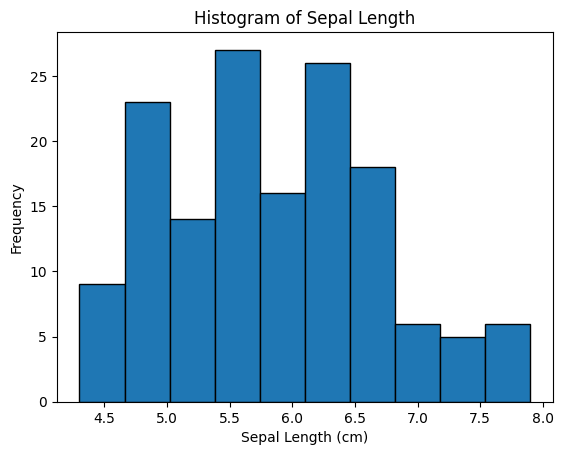

In [7]:
# Plot a histogram
plt.hist(sepal_length, bins=10, edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


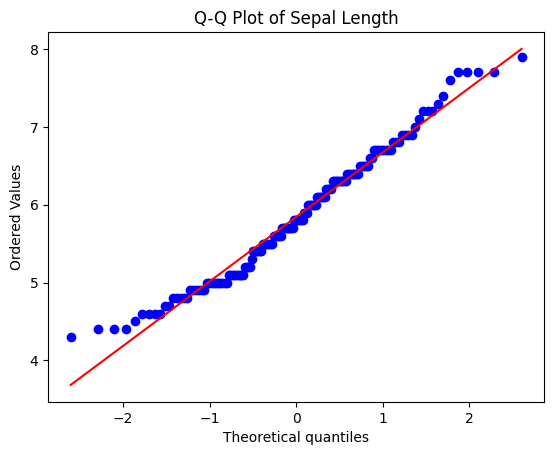

In [8]:

# Create a Q-Q plot
stats.probplot(sepal_length, dist="norm", plot=plt)
plt.title('Q-Q Plot of Sepal Length')
plt.show()

In [9]:

# Load the Titanic dataset
titanic = pd.read_csv('titanic.csv')


In [10]:
titanic.head()

## What is the probability of surviving when you are a passenger of class 1?
## probability of survival -- 50%
## probability of passenger1 -- 1/3 = 33.4%
## Survival and Passenger1 -- probability of survival * probability of passenger1 = 0.167
## 0.5 + 0.334 - 0.167 = 0.667

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
len(titanic[titanic['Pclass'] == 1])

216

In [12]:
len(titanic)

891

In [13]:
len(titanic[titanic['Pclass'] == 1]) / len(titanic)

0.24242424242424243

In [14]:
len(titanic[titanic['Survived'] == 1])

342

In [15]:
len(titanic[titanic['Survived'] == 1]) / len(titanic)

0.3838383838383838

In [16]:
len(titanic[(titanic['Pclass'] == 1) & (titanic['Survived'] == 1)])

136

In [17]:
len(titanic[(titanic['Pclass'] == 1) & (titanic['Survived'] == 1)]) / len(titanic)

0.1526374859708193

In [18]:
# Calculate probabilities
p_first_class = len(titanic[titanic['Pclass'] == 1]) / len(titanic)
p_survived = len(titanic[titanic['Survived'] == 1]) / len(titanic)
p_first_class_and_survived = len(titanic[(titanic['Pclass'] == 1) & (titanic['Survived'] == 1)]) / len(titanic)

In [19]:
# Apply the additive rule
p_first_class_or_survived = p_first_class + p_survived - p_first_class_and_survived
print(f"Probability of being in first-class or surviving: {p_first_class_or_survived:.3f}")

Probability of being in first-class or surviving: 0.474


In [20]:
titanic.head()

## What is the probability of female survival?


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
len(titanic[titanic['Sex'] == 'female'])

314

In [22]:
len(titanic[titanic['Sex'] == 'female']) / len(titanic)

0.35241301907968575

In [23]:
len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)])

233

In [24]:
len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]) / len(titanic[titanic['Sex'] == 'female'])

0.7420382165605095

In [25]:
# Calculate probabilities
p_female = len(titanic[titanic['Sex'] == 'female']) / len(titanic)
p_survived_given_female = len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]) / len(titanic[titanic['Sex'] == 'female'])


In [26]:
# Apply the multiplicative rule for dependent events
p_female_and_survived = p_female * p_survived_given_female
print(f"Probability of being female and surviving: {p_female_and_survived:.3f}")

Probability of being female and surviving: 0.262
